In [ ]:
#import os
#os.chdir("/content/drive/MyDrive/cancer project")

In [ ]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import  SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report
import pickle
%matplotlib inline


In [ ]:
df = pd.read_csv('processed_data.csv') #read SMA data
df.head()

,age,inv-nodes,deg-malig,irradiat,Class_no-recurrence-events,Class_recurrence-events,menopause_ge40,menopause_lt40,menopause_premeno,node-caps_?,node-caps_no,node-caps_yes,breast_left,breast_right,breast-quad_?,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up
0,1,0,3,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0
1,2,0,2,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1
2,2,0,2,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0
3,4,0,2,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
4,2,0,2,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0


In [ ]:
X = df.drop(columns = ['irradiat'],axis=0) #drop the target and Select only features as X
y = df['irradiat'] #target variable
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2) #split the data

In [ ]:
pipeline_dt=Pipeline([('dt_classifier',DecisionTreeClassifier())])
pipeline_randomforest=Pipeline([('rf_classifier',RandomForestClassifier())])

In [ ]:
pipelines = [pipeline_dt,pipeline_randomforest] # all 4 models arranged in a list

pipe_dict = {0: 'Decission Tree', 1:'RandomForest classifier'} #label 4 model algorithms

for pipe in pipelines: #iterate over 4 pipeline models and fit to the data
	pipe.fit(X_train, y_train)
    

In [ ]:
for i,model in enumerate(pipelines): #measure performance of all those 4 models
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Decission Tree Test Accuracy: 0.6896551724137931
RandomForest classifier Test Accuracy: 0.7413793103448276


In [ ]:
clf = RandomForestClassifier(n_estimators = 100,max_depth=2,n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.741


In [ ]:
pipe = Pipeline([("classifier", RandomForestClassifier())])




grid = [
       {
      "classifier":[RandomForestClassifier()],
       "classifier__n_estimators" : [100,200,300,400,500], 
      "classifier__max_depth":[2,3], #rf models are generated according to the all the possible combinations
      "classifier__n_jobs":[-1,1],
         
                 },
        
        {
      "classifier":[SVC()],
       "classifier__kernel" : ["linear",'sigmoid'],  
       "classifier__gamma":['auto','scale'],
      "classifier__C":[0.1],
         
                 },
     
        {"classifier": [LogisticRegression()],
        "classifier__penalty": ['l2'],
        "classifier__C": np.logspace(0, 4, 10),
        "classifier__solver":['newton-cg','saga','sag','liblinear'] ##This solvers don't allow L1 penalty
        },

          {
        'classifier': [DecisionTreeClassifier()],
     "classifier__criterion" : ['gini', 'entropy']
    }
]


    
 
 

In [ ]:
gridsearch = GridSearchCV(pipe, grid, cv=3, verbose=0,n_jobs=3,return_train_score=True) # Fit grid search, All the generated models fit the data indivdualy.
best_model = gridsearch.fit(X_train,y_train)

In [ ]:
best_model.best_params_

{'classifier': LogisticRegression(C=166.81005372000593, solver='newton-cg'),
 'classifier__C': 166.81005372000593,
 'classifier__penalty': 'l2',
 'classifier__solver': 'newton-cg'}

In [ ]:
pd.DataFrame(best_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__n_jobs,param_classifier__C,param_classifier__gamma,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.362402,0.064721,0.109205,0.004195,RandomForestClassifier(),2,100,-1,NaN,NaN,...,0.776316,0.776316,0.776316,0.000000,25,0.815789,0.789474,0.769737,0.791667,0.018865
1,0.283698,0.104014,0.026141,0.007030,RandomForestClassifier(),2,100,1,NaN,NaN,...,0.776316,0.776316,0.767544,0.012405,57,0.802632,0.789474,0.769737,0.787281,0.013518
2,0.669365,0.042637,0.120933,0.008302,RandomForestClassifier(),2,200,-1,NaN,NaN,...,0.750000,0.776316,0.771930,0.016411,43,0.802632,0.782895,0.769737,0.785088,0.013518
3,0.596035,0.012208,0.061744,0.007410,RandomForestClassifier(),2,200,1,NaN,NaN,...,0.776316,0.776316,0.767544,0.012405,57,0.822368,0.789474,0.763158,0.791667,0.024222
4,1.100893,0.119720,0.146194,0.049823,RandomForestClassifier(),2,300,-1,NaN,NaN,...,0.776316,0.776316,0.767544,0.012405,57,0.822368,0.782895,0.769737,0.791667,0.022364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.020436,0.009528,0.002878,0.000284,"LogisticRegression(C=166.81005372000593, solve...",NaN,NaN,NaN,10000.0,NaN,...,0.776316,0.802632,0.776316,0.021487,25,0.802632,0.796053,0.769737,0.789474,0.014212
62,0.014473,0.003742,0.002910,0.000304,"LogisticRegression(C=166.81005372000593, solve...",NaN,NaN,NaN,10000.0,NaN,...,0.776316,0.802632,0.780702,0.016411,11,0.802632,0.796053,0.769737,0.789474,0.014212
63,0.011053,0.000987,0.005124,0.002945,"LogisticRegression(C=166.81005372000593, solve...",NaN,NaN,NaN,10000.0,NaN,...,0.789474,0.815789,0.785088,0.027037,1,0.822368,0.789474,0.763158,0.791667,0.024222
64,0.006798,0.003460,0.004519,0.002214,DecisionTreeClassifier(),NaN,NaN,NaN,NaN,NaN,...,0.697368,0.736842,0.701754,0.027037,66,0.960526,0.947368,0.947368,0.951754,0.006203


In [ ]:
y_predicted = best_model.predict(X_test)
metrics.accuracy_score(y_test,y_predicted)

0.8103448275862069

In [ ]:
metrics.confusion_matrix(y_test,y_pred)

array([[42,  1],
       [14,  1]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85        43
           1       0.50      0.07      0.12        15

    accuracy                           0.74        58
   macro avg       0.62      0.52      0.48        58
weighted avg       0.69      0.74      0.66        58




[[41  2]
 [ 9  6]]


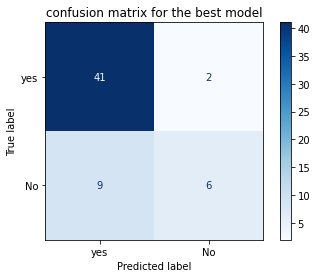

In [ ]:
display = ConfusionMatrixDisplay.from_estimator(
        best_model,
        X_test,
        y_test,
        display_labels=["yes","No"],
        cmap=plt.cm.Blues,
        
    )
display.ax_.set_title('confusion matrix for the best model')
print()
print(display.confusion_matrix)

plt.show()